In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster

In [22]:
df = pd.read_csv('data/retail_warehouses.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,county,state,state_abbrev,size_rank,avg_home_price,area_sq_mi,unemployment_rate,unemployment_change,less_high_school,high_school,...,pop_growth,poverty_rate,median_hh_income,property_tax_rate,amazon_indicator,walmart_indicator,warehouse_target,pop_density,latitude,longitude
0,Los Angeles County,California,CA,1,560333.416667,4750.94,4.8,-7.7,21.8,20.7,...,3.016829,14.9,64912,0.699057,0,1,1,2129.843568,34.315507,-118.209681
1,San Diego County,California,CA,5,530174.833333,4525.68,4.0,-6.8,13.3,18.6,...,7.158882,11.9,76048,0.699057,0,0,0,734.799632,32.963784,-116.770628
2,Orange County,California,CA,6,670382.666667,948.07,3.5,-6.2,15.3,17.3,...,5.416470,11.5,86031,0.699057,0,0,0,3354.129969,33.750038,-117.870493
3,Riverside County,California,CA,11,341060.000000,7303.42,5.2,-8.6,18.9,26.4,...,9.791375,12.9,63776,0.699057,1,1,1,330.971517,33.721999,-116.037247
4,San Bernardino County,California,CA,12,307173.166667,20104.83,4.9,-8.6,20.8,26.2,...,5.502104,16.0,60270,0.699057,1,1,1,107.098792,34.825302,-116.083314


In [45]:
wm_locations = df.loc[df.walmart_indicator == 1][['latitude', 'longitude']]
locationlist1 = wm_locations.values.tolist()
len(locationlist1)

118

In [46]:
aws_locations = df.loc[df.amazon_indicator == 1][['latitude', 'longitude']]
locationlist2 = aws_locations.values.tolist()
len(locationlist2)

76

In [48]:
wh_map = folium.Map(location=[39.83, -98.59], tiles='CartoDB positron', zoom_start=4)

marker_cluster = MarkerCluster().add_to(wh_map)
marker_cluster2 = MarkerCluster().add_to(wh_map)

for point in range(0, len(locationlist1)):
    folium.Marker(locationlist[point], popup=df['county'][point], icon=folium.Icon(color='darkblue', icon_color='yellow', icon='shopping-cart',prefix='fa',angle=0)).add_to(marker_cluster)
for point in range(0, len(locationlist2)):
    folium.Marker(locationlist[point], popup=df['county'][point], icon=folium.Icon(color='orange', icon_color='black', icon='amazon',prefix='fa',angle=0)).add_to(marker_cluster2)
wh_map

**Correlation Matrix of All Variables:**

In [58]:
df.size_rank = df.size_rank.astype(str)

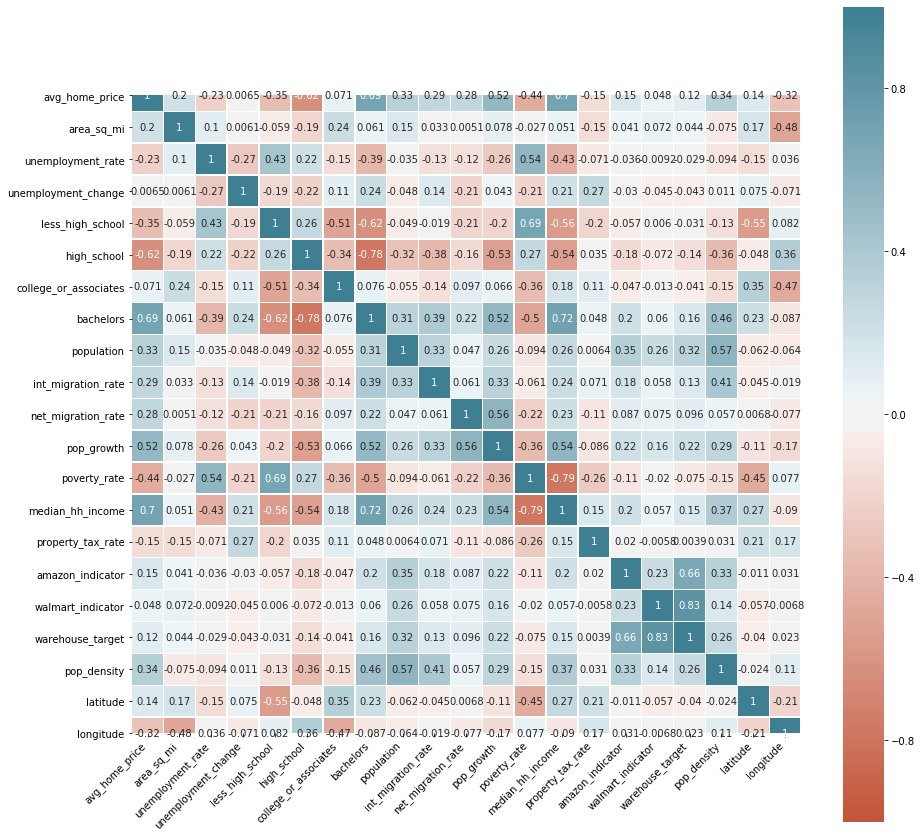

In [59]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True,
    linewidths = 0.5
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [96]:
len(df.select_dtypes(include=['int','float']).columns)

21

In [86]:
list(range(4))

[0, 1, 2, 3]

(array([1.481e+03, 6.770e+02, 1.430e+02, 2.600e+01, 2.000e+01, 8.000e+00,
        4.000e+00, 0.000e+00, 1.000e+00, 3.000e+00]),
 array([  27923.91666667,  141989.38333333,  256054.85      ,
         370120.31666667,  484185.78333333,  598251.25      ,
         712316.71666667,  826382.18333333,  940447.65      ,
        1054513.11666667, 1168578.58333333]),
 <a list of 10 Patch objects>)

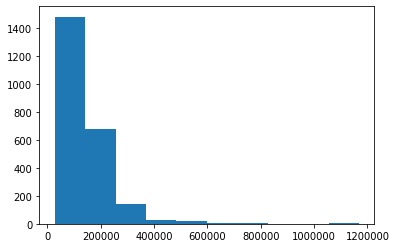

In [71]:
plt.hist(df.avg_home_price)

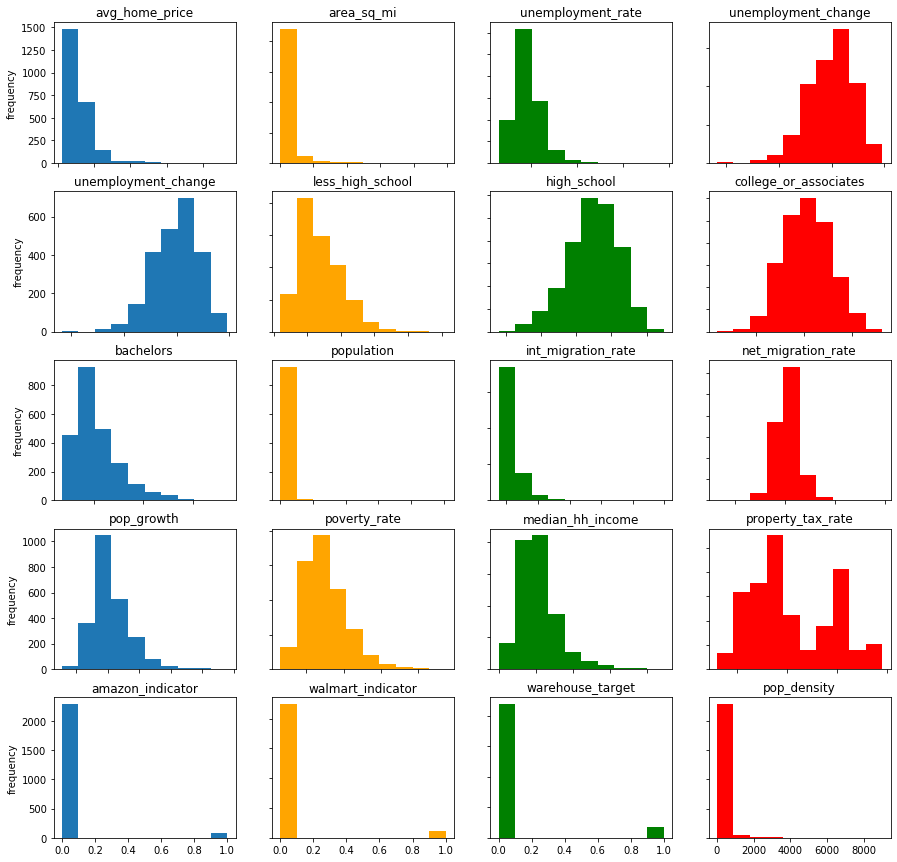

In [102]:
columns = list(df.select_dtypes(include=['int','float']).columns)

fig, axs = plt.subplots(5, 4,figsize=(15,15))
axs[0, 0].hist(df[columns[0]])
axs[0, 0].set_title(f'{columns[0]}')
axs[0, 1].hist(df[columns[1]], color='orange')
axs[0, 1].set_title(f'{columns[1]}')
axs[0, 2].hist(df[columns[2]], color='green')
axs[0, 2].set_title(f'{columns[2]}')
axs[0, 3].hist(df[columns[3]], color='red')
axs[0, 3].set_title(f'{columns[3]}')
axs[1, 0].hist(df[columns[3]])
axs[1, 0].set_title(f'{columns[3]}')
axs[1, 1].hist(df[columns[4]], color='orange')
axs[1, 1].set_title(f'{columns[4]}')
axs[1, 2].hist(df[columns[5]], color='green')
axs[1, 2].set_title(f'{columns[5]}')
axs[1, 3].hist(df[columns[6]], color='red')
axs[1, 3].set_title(f'{columns[6]}')
axs[2, 0].hist(df[columns[7]])
axs[2, 0].set_title(f'{columns[7]}')
axs[2, 1].hist(df[columns[8]], color='orange')
axs[2, 1].set_title(f'{columns[8]}')
axs[2, 2].hist(df[columns[9]], color='green')
axs[2, 2].set_title(f'{columns[9]}')
axs[2, 3].hist(df[columns[10]], color='red')
axs[2, 3].set_title(f'{columns[10]}')
axs[3, 0].hist(df[columns[11]])
axs[3, 0].set_title(f'{columns[11]}')
axs[3, 1].hist(df[columns[12]], color='orange')
axs[3, 1].set_title(f'{columns[12]}')
axs[3, 2].hist(df[columns[13]], color='green')
axs[3, 2].set_title(f'{columns[13]}')
axs[3, 3].hist(df[columns[14]], color='red')
axs[3, 3].set_title(f'{columns[14]}')
axs[4, 0].hist(df[columns[15]])
axs[4, 0].set_title(f'{columns[15]}')
axs[4, 1].hist(df[columns[16]], color='orange')
axs[4, 1].set_title(f'{columns[16]}')
axs[4, 2].hist(df[columns[17]], color='green')
axs[4, 2].set_title(f'{columns[17]}')
axs[4, 3].hist(df[columns[18]], color='red')
axs[4, 3].set_title(f'{columns[18]}')



for ax in axs.flat:
    ax.set(xlabel='', ylabel='frequency')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()